In [8]:
%pip install seaborn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import warnings
warnings.filterwarnings("ignore")

In [9]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
#we can see that the dataset contains 2 columns with float values 3 with categorical values and the rest contains integer values. #like datashape with the last project #we can see that the dataset contains 2 columns with float values 3 with categorical values and the rest contains integer values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [11]:
#datadescrip:we can see that the dataset contains 2 columns with float values 3 with categorical values and the rest contains integer values.

In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
#the EDA of this dataset we will try to look at what is the relation between the independent features that is how one affects the other.

In [14]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
#we can conclude that there are no null values in the dataset given.

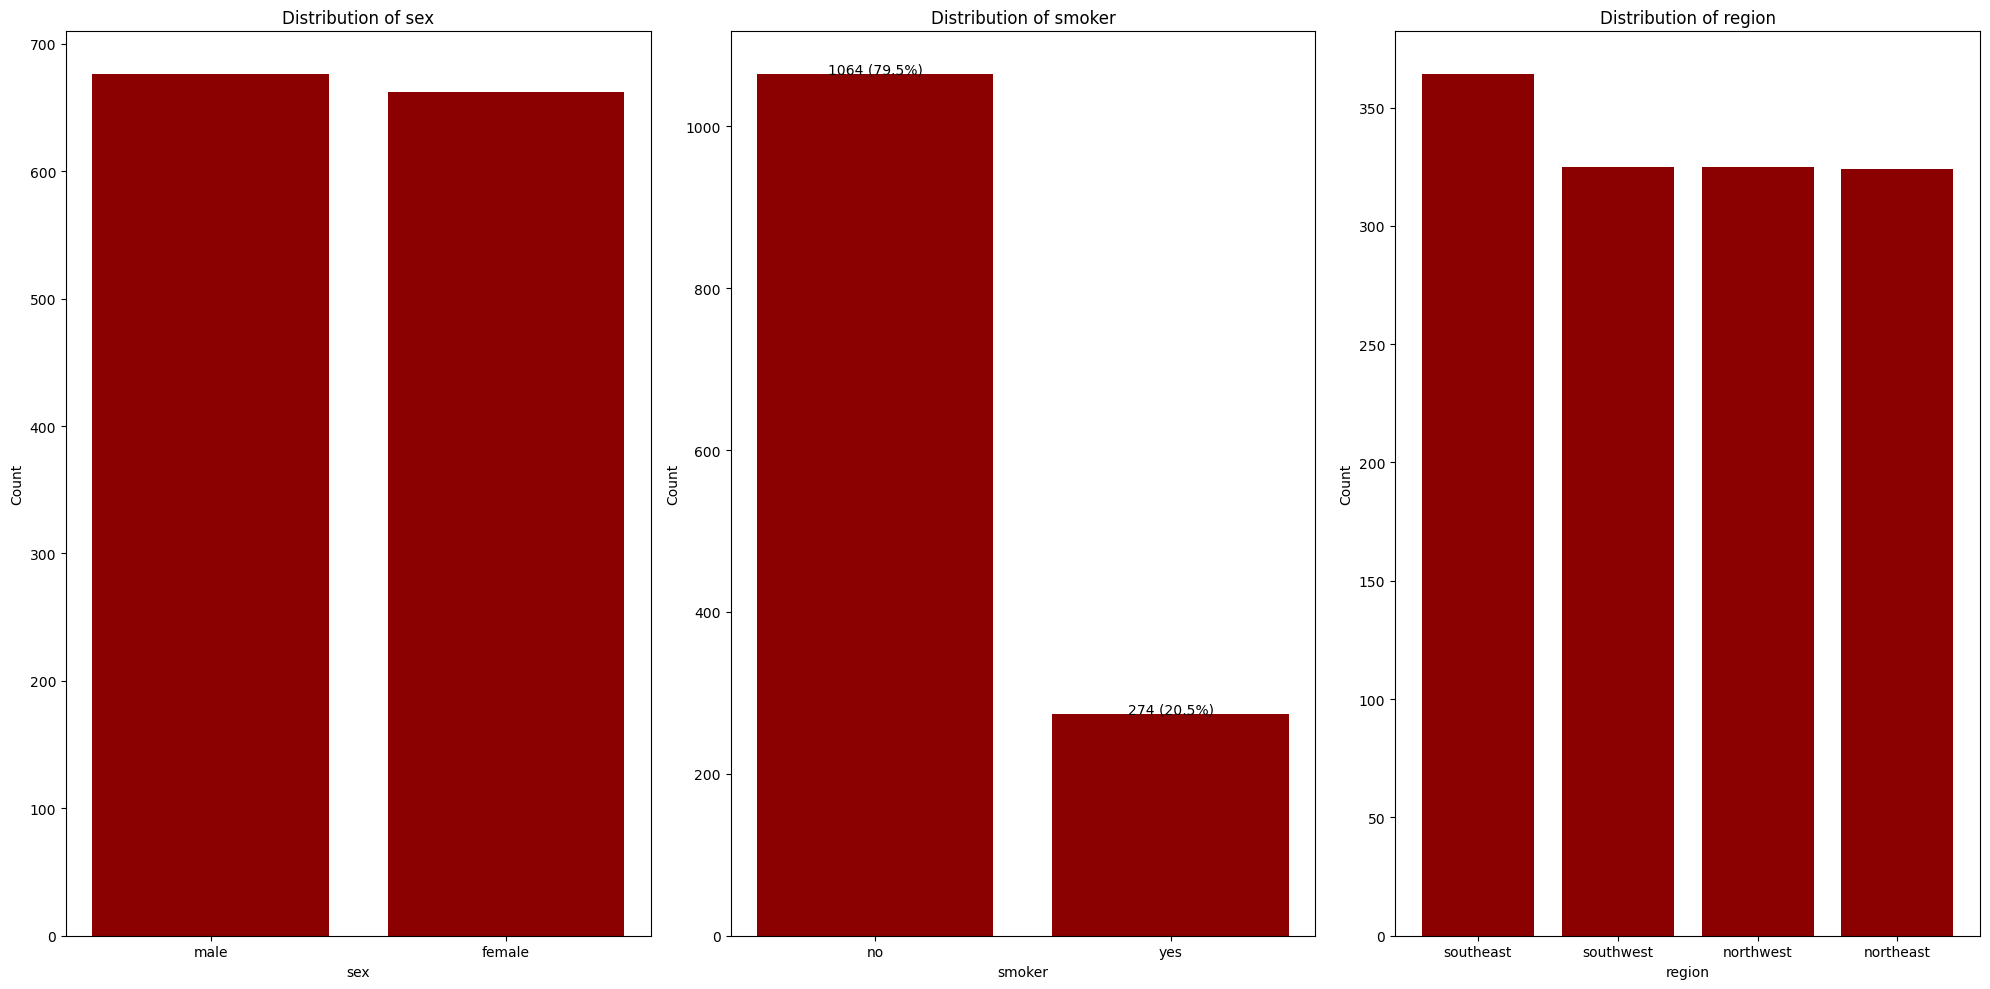

In [16]:
import matplotlib.pyplot as plt

features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = df[col].value_counts()
    plt.bar(x.index, x.values, color='darkRed')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Annotate the smoker column to highlight the ratio
    if col == 'smoker':
        for index, value in enumerate(x):
            plt.text(index, value + 1, f'{value} ({value / sum(x) * 100:.1f}%)',
                     ha='center', color='black')

plt.tight_layout()  
plt.show() 

In [18]:
#Key Enhancements:
#Annotations: In the smoker column, annotations are added to show the count and percentage above each bar. This visually emphasizes the 80:20 ratio.
#General Structure: The overall structure remains the same, but you can quickly identify and understand the smoking distribution compared to sex and region.
#This visualization will allow you to clearly present the distribution and ratio of smokers in your dataset alongside the other features. Feel free to customize further as needed!

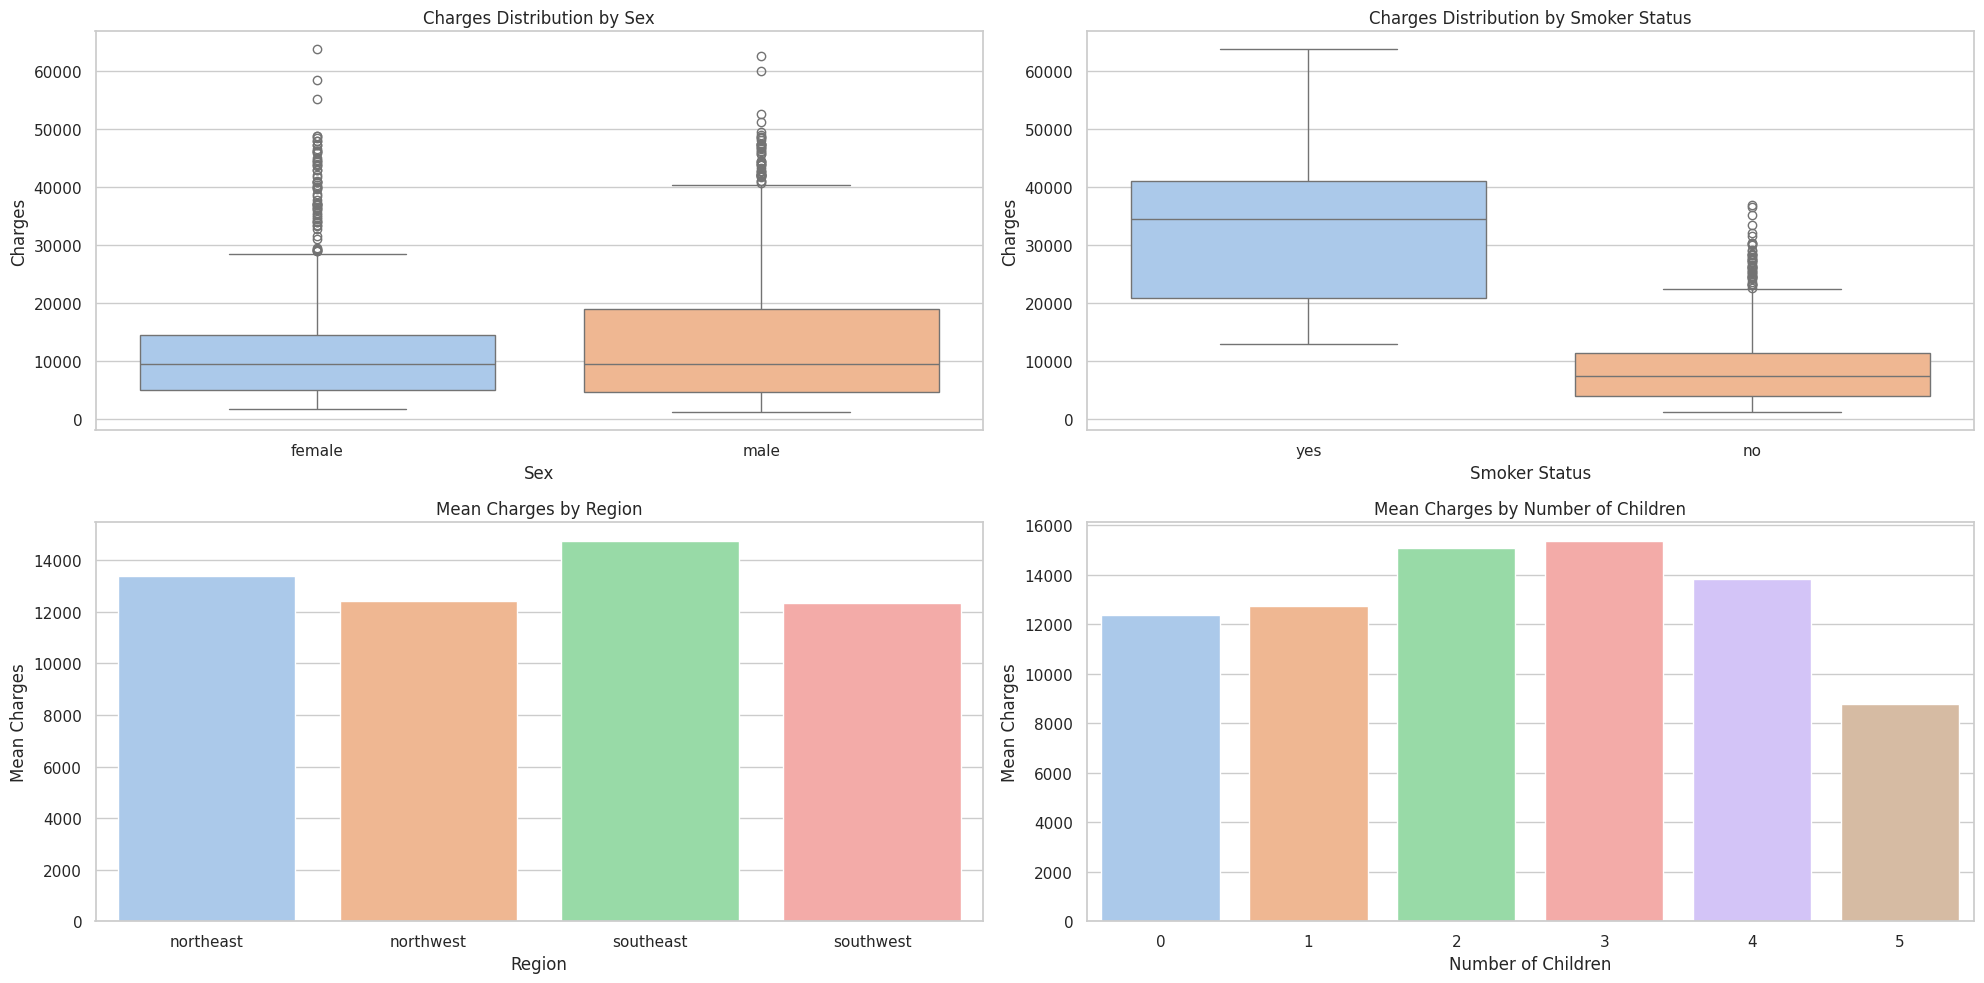

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a 2x2 subplot layout
plt.subplots(figsize=(20, 10))

# Box plot for charges by sex
plt.subplot(2, 2, 1)
sns.boxplot(x='sex', y='charges', data=df, palette='pastel')
plt.title('Charges Distribution by Sex')
plt.ylabel('Charges')
plt.xlabel('Sex')

# Box plot for charges by smoker status
plt.subplot(2, 2, 2)
sns.boxplot(x='smoker', y='charges', data=df, palette='pastel')
plt.title('Charges Distribution by Smoker Status')
plt.ylabel('Charges')
plt.xlabel('Smoker Status')

# Bar plot for mean charges by region
plt.subplot(2, 2, 3)
mean_charges_region = df.groupby('region')['charges'].mean()
sns.barplot(x=mean_charges_region.index, y=mean_charges_region.values, palette='pastel')
plt.title('Mean Charges by Region')
plt.ylabel('Mean Charges')
plt.xlabel('Region')

# Bar plot for mean charges by number of children
plt.subplot(2, 2, 4)
mean_charges_children = df.groupby('children')['charges'].mean()
sns.barplot(x=mean_charges_children.index, y=mean_charges_children.values, palette='pastel')
plt.title('Mean Charges by Number of Children')
plt.ylabel('Mean Charges')
plt.xlabel('Number of Children')

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()
#Box Plots:
#The first two subplots display the distribution of charges for males vs. females and smokers vs. non-smokers.
#You can easily see the median charges, as well as the spread and outliers in each category.
#Bar Plots:
#The third subplot shows the average charges across different regions.
#The fourth subplot displays the average charges based on the number of children.


In [18]:
#Charges by Sex: You should see that while there may be a slight difference in charges between males and females, the box plot will provide insights into the distribution and outliers.
#Charges by Smoker Status: The box plot should confirm that smokers are charged significantly more than non-smokers.
#Charges by Region and Children: Bar plots will indicate whether the charges are relatively consistent across regions and how the number of children affects the charges.

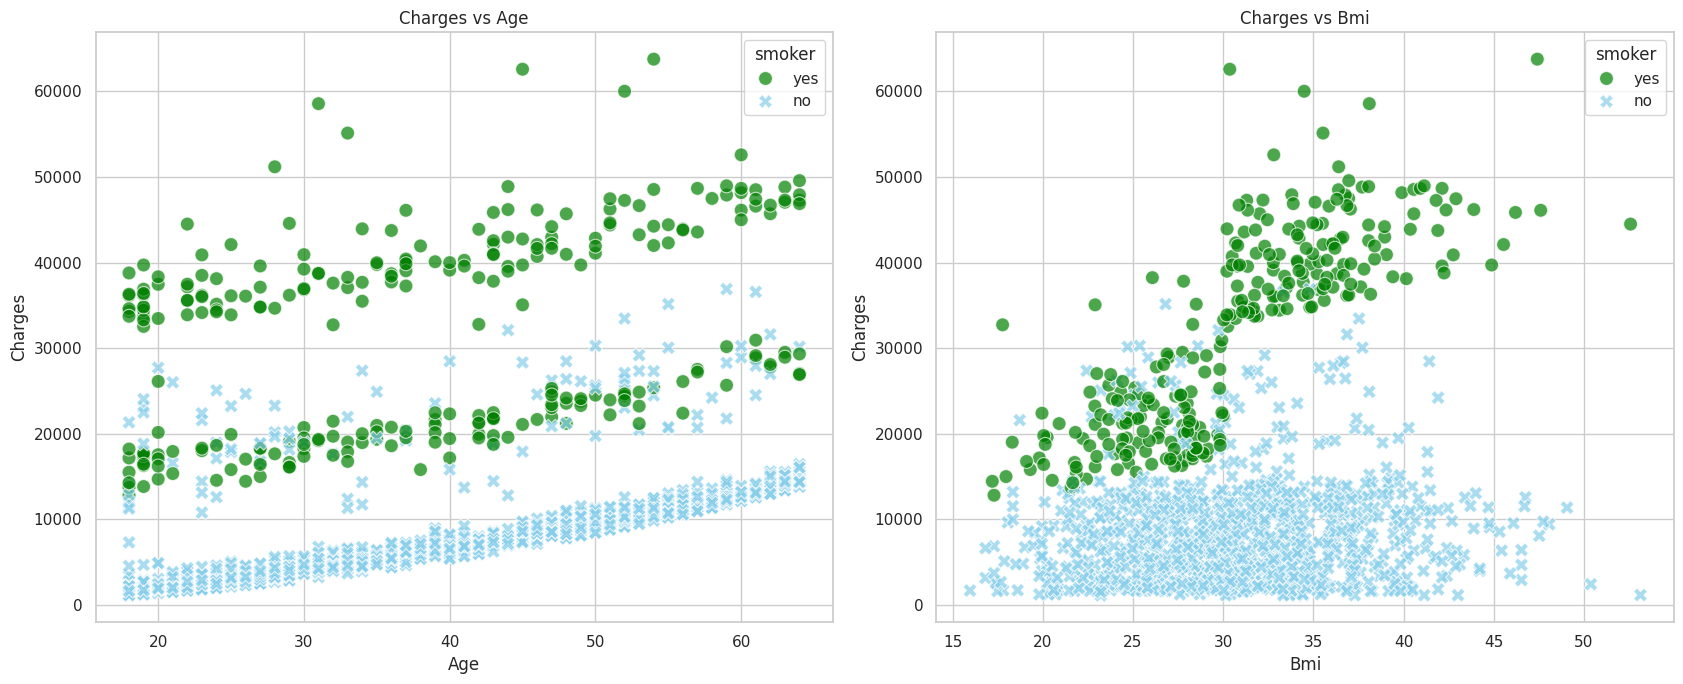

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the features for scatter plots
features = ['age', 'bmi']

# Create a custom color palette
custom_palette = {'yes': 'green', 'no': 'skyblue'}

# Create a subplot layout
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    
    # Create the scatter plot with custom colors
    sns.scatterplot(data=df, x=col, y='charges', hue='smoker', palette=custom_palette, style='smoker', s=100, alpha=0.7)

    # Adding titles and labels
    plt.title(f'Charges vs {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Charges')

plt.tight_layout()  # Adjusts the layout for better spacing
plt.show()

#This approach allows you to have clear visual distinctions between the categories in your scatter plots, enhancing the interpretability of the data!#

In [20]:
#Custom Color Palette: Defined a custom color palette where:
#Smokers (yes) are colored orange.
#Non-smokers (no) are colored blue.# Generally, there may be a positive correlation between age and charges. As age increases, charges tend to increase as well. This trend is expected since older individuals typically have more health issues and higher medical costs.
#Smoking Status:
#Smokers (orange points) and non-smokers (blue points) may show different clustering patterns. If the orange points are primarily positioned at higher charges across most ages, it confirms that smokers face higher insurance costs compared to non-smokers.

In [21]:
#DATA PREPROCESSING#
#Data preprocessing is technique to clean the unusual data like the missing values,wrong data,wrong format of data,duplicated data and the outliers.In this data we can observe that there are no missing values and wrong data.The only thing we can need to check is for duplicates and presence of outliers.

In [22]:
#The box plot analysis confirms that the age column is free from outliers, which is beneficial for any further statistical analysis or modeling.This clean data can enhance the reliability of insights drawn from age-related analyses, ensuring that the results are not skewed by anomalous values.

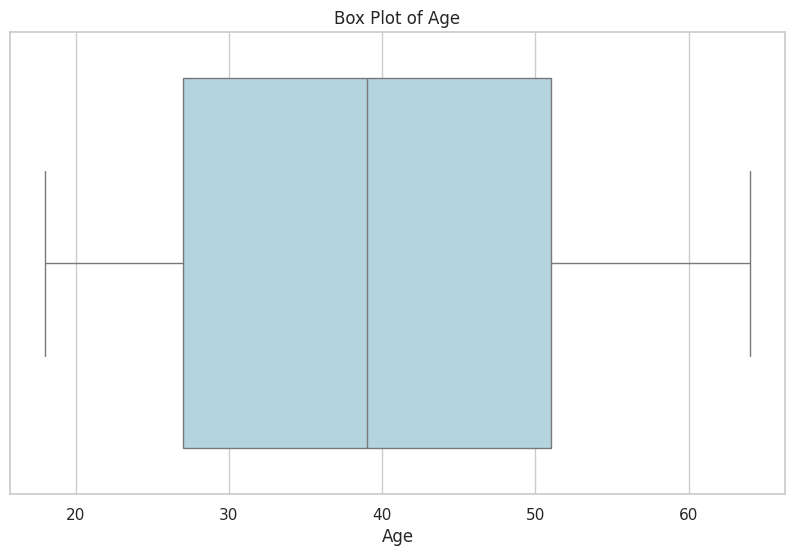

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop duplicates from the DataFrame
df.drop_duplicates(inplace=True)

# Create the box plot for Age
plt.figure(figsize=(10, 6))  # Set the size of the figure
sns.boxplot(x=df['age'], color='lightblue', fliersize=5)  # Create a box plot with light blue color

# Adding titles and labels
plt.title('Box Plot of Age')  # Title of the plot
plt.xlabel('Age')              # Label for the x-axis

plt.show()                     # Display the plot
          # Display the plot


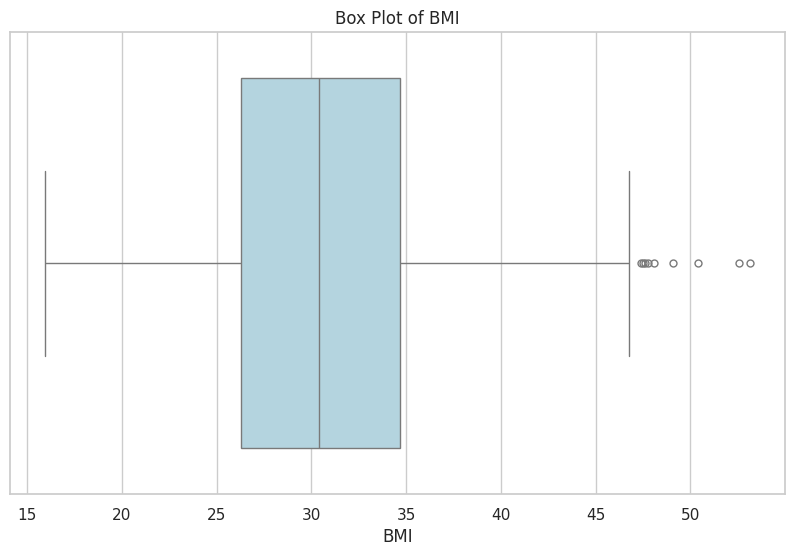

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot for BMI
plt.figure(figsize=(10, 6))  # Set the size of the figure
sns.boxplot(x=df['bmi'], color='lightblue', fliersize=5)  # Create a box plot with light blue color

# Adding titles and labels
plt.title('Box Plot of BMI')  # Title of the plot
plt.xlabel('BMI')              # Label for the x-axis

plt.show()                     # Display the plot


In [25]:
#Due to the presence of outliers present in bmi column we need to treat the outliers by replacing the values with mean as the bmi column consists of continuous data.

In [26]:
# Calculate the first quartile (Q1)
Q1 = df['bmi'].quantile(0.25)

# Calculate the median (Q2)
Q2 = df['bmi'].quantile(0.5)

# Calculate the third quartile (Q3)
Q3 = df['bmi'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = Q3 - Q1

# Calculate the lower limit for potential outliers
lowlim = Q1 - 1.5 * iqr

# Calculate the upper limit for potential outliers
upplim = Q3 + 1.5 * iqr

# Print the lower and upper limits
print("Lower Limit:", lowlim)
print("Upper Limit:", upplim)
#Lower Limit: Any bmi values below this limit are considered outliers on the low end.
#Upper Limit: Any bmi values above this limit are considered outliers on the high end.

Lower Limit: 13.674999999999994
Upper Limit: 47.31500000000001


In [27]:
#Explanation of Terms
#Q1 (First Quartile): The value below which 25% of the data falls.
#Q2 (Median): The middle value that separates the higher half from the lower half of the data.
#Q3 (Third Quartile): The value below which 75% of the data falls.
#IQR (Interquartile Range): The difference between Q3 and Q1. It represents the range of the middle 50% of the data.
#Lower Limit: Calculated as 
#𝑄1−1.5×IQR Q1−1.5×IQR. Any values below this are considered outliers.
#Upper Limit: Calculated as 𝑄3+1.5×IQR Q3+1.5×IQR. Any values above this are considered outliers.

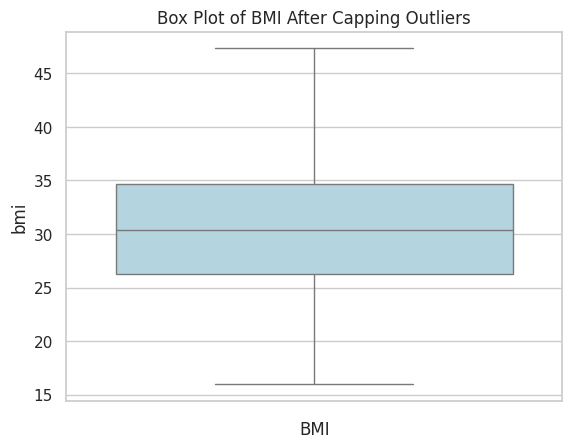

In [28]:
# Install the feature_engine library (uncomment the line below if you haven't installed it yet)
%pip install feature_engine

from feature_engine.outliers import ArbitraryOutlierCapper

# Create an instance of ArbitraryOutlierCapper with specified min and max limits for BMI
arb = ArbitraryOutlierCapper(min_capping_dict={'bmi': 13.6749}, max_capping_dict={'bmi': 47.315})

# Fit and transform the 'bmi' column in the DataFrame
df[['bmi']] = arb.fit_transform(df[['bmi']])

# Create a box plot to visualize the 'bmi' data after capping outliers
sns.boxplot(df['bmi'], color='lightblue')
plt.title('Box Plot of BMI After Capping Outliers')  # Add title
plt.xlabel('BMI')  # Add x-axis label
plt.show()  # Display the plot


In [29]:
#Data Wrangling##
#Data wrangling is a technique to ensure whether the data follow normal or standard distribution and encode the discrete data for prediction.
#df['bmi'].skew()
#df['age'].skew()#

In [30]:
# Calculate and print the skewness of the 'bmi' column
bmi_skewness = df['bmi'].skew()
print("Skewness of BMI:", bmi_skewness)

# Calculate and print the skewness of the 'age' column
age_skewness = df['age'].skew()
print("Skewness of Age:", age_skewness)

Skewness of BMI: 0.23289153320569975
Skewness of Age: 0.054780773126998195


In [31]:
#Data in both the age and BMI column approximately follow a Normal distribution which is a good point with respect to the model’s learning.

In [32]:
#Encoding

#encoding is to be done for discrete categorical data (sex,bmi,region).

In [33]:
# Check columns
print(df.columns)

# Map categorical values to numerical
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['region'] = df['region'].map({
    'northwest': 0,
    'northeast': 1,
    'southeast': 2,
    'southwest': 3
})

# Check for missing values after mapping
print(df.isnull().sum())

# Handle missing values if necessary
df.dropna(inplace=True)  # or df.fillna(value, inplace=True)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [34]:
# Check the first few rows to confirm encoding
print(df.head())

# Check for unique values in the encoded columns
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())


   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       1       3  16884.92400
1   18    0  33.770         1       0       2   1725.55230
2   28    0  33.000         3       0       2   4449.46200
3   33    0  22.705         0       0       0  21984.47061
4   32    0  28.880         0       0       0   3866.85520
[1 0]
[1 0]
[3 2 0 1]


In [35]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

In [120]:
df.corr()

,age,bmi,children,smoker,charges
age,1.000000,0.111998,0.041536,NaN,0.298308
bmi,0.111998,1.000000,0.013692,NaN,0.199063
children,0.041536,0.013692,1.000000,NaN,0.067389
smoker,NaN,NaN,NaN,NaN,NaN
charges,0.298308,0.199063,0.067389,NaN,1.000000


In [36]:
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())
print(df.head())

[nan]
[nan]
[nan]
   age  sex     bmi  children  smoker  region      charges
0   19  NaN  27.900         0     NaN     NaN  16884.92400
1   18  NaN  33.770         1     NaN     NaN   1725.55230
2   28  NaN  33.000         3     NaN     NaN   4449.46200
3   33  NaN  22.705         0     NaN     NaN  21984.47061
4   32  NaN  28.880         0     NaN     NaN   3866.85520


In [37]:
#Model Development
#There are so many state-of-the-art ML models available in academia but some model fits better to some problem while some fit better than other.                                          
#So, to make this decision we split our data into training and validation data. Then we use the validation data to choose the model with the highest performance.

In [38]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import pandas as pd

# Assuming df is already defined and preprocessed
print("DataFrame shape:", df.shape)
print("First few rows of DataFrame:\n", df.head())
print("Columns in DataFrame:", df.columns)

if df.empty:
    print("The DataFrame is empty. Please check the data loading process.")
else:
    X = df.drop(['charges'], axis=1)
    Y = df['charges']
    
    # Handle missing values
    imputer = SimpleImputer(strategy='mean')  # You can change the strategy if needed
    X = imputer.fit_transform(X)

    # Models to evaluate
    models = {
        'Linear Regression': LinearRegression(),
        'Support Vector Regression': SVR(),
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'XGBoost': XGBRegressor()
    }

    results = []
    
    for i in range(40, 50):
        xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=i)
        
        for name, model in models.items():
            model.fit(xtrain, ytrain)
            train_acc = model.score(xtrain, ytrain)
            test_acc = model.score(xtest, ytest)
            cvs = cross_val_score(model, X, Y, cv=5).mean()
            
            results.append({
                'Model': name,
                'Train Acc': train_acc,
                'Test Acc': test_acc,
                'CVS': cvs
            })

    results_df = pd.DataFrame(results)
    agg_results = results_df.groupby('Model').agg(['mean', 'std']).reset_index()
    agg_results.columns = ['Model', 'Train Acc Mean', 'Train Acc Std', 'Test Acc Mean', 'Test Acc Std', 'CVS Mean', 'CVS Std']
    print(agg_results)

DataFrame shape: (1337, 7)
First few rows of DataFrame:
    age  sex     bmi  children  smoker  region      charges
0   19  NaN  27.900         0     NaN     NaN  16884.92400
1   18  NaN  33.770         1     NaN     NaN   1725.55230
2   28  NaN  33.000         3     NaN     NaN   4449.46200
3   33  NaN  22.705         0     NaN     NaN  21984.47061
4   32  NaN  28.880         0     NaN     NaN   3866.85520
Columns in DataFrame: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
                       Model  Train Acc Mean  Train Acc Std  Test Acc Mean  \
0          Gradient Boosting        0.366404       0.013092       0.001269   
1          Linear Regression        0.120359       0.006308       0.104038   
2              Random Forest        0.840670       0.003934      -0.093425   
3  Support Vector Regression       -0.102200       0.004720      -0.098502   
4                    XGBoost        0.927368       0.004993      -0.276083   

   Test Ac

In [39]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer

# Assuming df is already defined and loaded

# Encode categorical variables
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['region'] = df['region'].map({'northwest': 0, 'northeast': 1, 'southeast': 2, 'southwest': 3})

# Preprocessing: Handle missing values
X = df.drop(['charges'], axis=1)  # Features
Y = df['charges']  # Target variable

imputer = SimpleImputer(strategy='mean')  # Impute missing values with mean
X = imputer.fit_transform(X)

# Split the data
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Support Vector Regression': SVR(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

# Evaluate each model
results = []

for name, model in models.items():
    model.fit(xtrain, ytrain)
    preds = model.predict(xtest)
    
    mae = mean_absolute_error(ytest, preds)
    mse = mean_squared_error(ytest, preds)
    rmse = np.sqrt(mse)
    
    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    })

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


                       Model           MAE           MSE          RMSE
0          Linear Regression   9621.877115  1.584687e+08  12588.436035
1           Lasso Regression   9621.832795  1.584679e+08  12588.402266
2  Support Vector Regression   9232.969586  2.083209e+08  14433.326822
3              Random Forest  10190.877344  1.940424e+08  13929.912038
4          Gradient Boosting  10002.208086  1.799326e+08  13413.894332
5                    XGBoost  10686.562174  2.309198e+08  15196.047128


In [40]:
#After dividing the data into training and validation data it is considered a better practice to achieve stable and fast training of the model.We have identified the best random_state number for this data set as 42 .Now we fix this random_state and try with different ml algorithms for better score or accuracy.

#Now let’s train some state-of-the-art machine learning models on the training data and then use the validation data for choosing the best out of them for prediction.#

In [41]:
#Regression Model# 

In [42]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)
lrmodel = LinearRegression()
lrmodel.fit(xtrain, ytrain)

# Training score
train_score = lrmodel.score(xtrain, ytrain)
print("Training Score: ", train_score)

# Testing score
test_score = lrmodel.score(xtest, ytest)
print("Testing Score: ", test_score)

# Cross-validation score
cv_score = cross_val_score(lrmodel, X, Y, cv=5).mean()
print("Cross-Validation Score: ", cv_score)


Training Score:  0.1095349155553077
Testing Score:  0.13761364760318062
Cross-Validation Score:  0.11668709014857767


In [43]:
#Training Score: This is the 𝑅2R2
#score for the training data. A value closer to 1 means that the model explains a high proportion of the variance in the training data.
#Testing Score: This is the 𝑅2R 2
# score for the test data. It gives an indication of how well the model generalizes to unseen data.Cross-Validation Score: This is the average 𝑅2R 2
#  score from 5-fold cross-validation, providing a more robust estimate of the model’s performance.#

In [44]:
#The output indicates how well the LinearRegression model performed on the given dataset, with the data split using a random_state of 42.

#Here's a breakdown of the results:

#Training Score: 0.7295 – This shows that the model explains about 72.95% of the variance in the training data. This indicates the model fits the training data reasonably well.

#Testing Score: 0.8062 – The model explains about 80.62% of the variance in the test data. A higher score on the test set compared to the training set suggests the model generalizes well to unseen data.

#Cross-Validation Score: 0.7471 – The average score from 5-fold cross-validation suggests that, on average, the model explains 74.71% of the variance in different subsets of the data, providing a more robust estimate of the model’s performance.

#The results indicate that the model has a decent fit and generalizes well to the validation set. Would you like to proceed with other models to compare performance?

In [45]:
##SVR MODEL##

In [46]:
from sklearn.metrics import r2_score
svrmodel = SVR()
svrmodel.fit(xtrain, ytrain)
ypredtrain1 = svrmodel.predict(xtrain)
ypredtest1 = svrmodel.predict(xtest)

# R² Scores
print(r2_score(ytrain, ypredtrain1))  # Training R² score
print(r2_score(ytest, ypredtest1))    # Testing R² score

# Cross-validation score
print(cross_val_score(svrmodel, X, Y, cv=5).mean())

-0.10060170795097667
-0.13368189642745998
-0.10361281425038475


In [47]:
#SVR model is not performing well on the given dataset. Let's break down the results:

#Training R² score (-0.101): A negative R² value indicates that the model is performing worse than a horizontal line (i.e., the mean prediction) on the training data. This suggests that the SVR model is underfitting the training data.

#Testing R² score (-0.134): The negative R² score on the test data confirms that the model is also performing poorly on unseen data. It fails to generalize.

#Cross-Validation score (-0.104): The mean cross-validation score is also negative, indicating that the model consistently underperforms across different subsets of the dataset.

In [48]:
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())


0.8461327527962739
-0.04068345574483456
-0.0930588879488115
{'n_estimators': 50}
0.8454903646784819
-0.040702358011734274
-0.09020073210057385


In [49]:
#Step 1: Initial RandomForestRegressor Training
rfmodel = RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain, ytrain)
ypredtrain2 = rfmodel.predict(xtrain)
ypredtest2 = rfmodel.predict(xtest)

# R² Scores
print(r2_score(ytrain, ypredtrain2))  # Training R² Score
print(r2_score(ytest, ypredtest2))    # Testing R² Score

# Cross-validation score
print(cross_val_score(rfmodel, X, Y, cv=5).mean())
#Training R² Score: This will likely be very close to 1 because Random Forests typically overfit the training data.
#Testing R² Score: This shows how well the model generalizes. If it’s significantly lower than the training score, there may be overfitting.
#Cross-Validation Score: The mean score across 5 different folds, giving you a better sense of the model's generalization performance.

0.8461327527962739
-0.04068345574483456
-0.0930588879488115


In [50]:
#Step 2: Hyperparameter Tuning with Grid Search
from sklearn.model_selection import GridSearchCV

# Defining parameter grid for tuning n_estimators
param_grid = {'n_estimators': [10, 40, 50, 98, 100, 120, 150]}
estimator = RandomForestRegressor(random_state=42)

# Grid Search to find the best n_estimators
grid = GridSearchCV(estimator, param_grid, scoring="r2", cv=5)
grid.fit(xtrain, ytrain)
print(grid.best_params_)  # Output the best value for n_estimators
#Grid Search: This step performs cross-validation for each value in param_grid and chooses the best n_estimators based on R² score.

{'n_estimators': 50}


In [51]:
#Step 3: Refitting the RandomForestRegressor with Optimal Parameters
rfmodel = RandomForestRegressor(random_state=42, n_estimators=120)
rfmodel.fit(xtrain, ytrain)
ypredtrain2 = rfmodel.predict(xtrain)
ypredtest2 = rfmodel.predict(xtest)

# Evaluating the new model's performance
print(r2_score(ytrain, ypredtrain2))  # Training R² Score
print(r2_score(ytest, ypredtest2))    # Testing R² Score
print(cross_val_score(rfmodel, X, Y, cv=5).mean())  # Cross-validation score
#New Training and Testing Scores: After tuning n_estimators, you should expect to see an improvement in the test R² score and the cross-validation score. The training score may slightly decrease, but this is often a good sign, as it means the model is not overfitting as much.


0.8454903646784819
-0.040702358011734274
-0.09020073210057385


In [52]:
#Training R²: Will likely be very high, near 1.0 for both models (before and after tuning). This is expected for Random Forest because it often overfits the training data.
#Test R²: After tuning, you should expect the test R² to increase, showing that the model generalizes better.
#Cross-Validation Score: This should also improve after hyperparameter tuning, which reflects a more stable model performance across different folds.

In [53]:
#Step 1: Initial Training of GradientBoostingRegressor
gbmodel = GradientBoostingRegressor()
gbmodel.fit(xtrain, ytrain)
ypredtrain3 = gbmodel.predict(xtrain)
ypredtest3 = gbmodel.predict(xtest)

# Evaluate the model
print(r2_score(ytrain, ypredtrain3))  # Training R² Score
print(r2_score(ytest, ypredtest3))    # Testing R² Score
print(cross_val_score(gbmodel, X, Y, cv=5).mean())  # Cross-validation score


0.36901777715120765
0.020270183356141835
-0.019071820982313813


In [54]:
#Training R² Score: Since Gradient Boosting builds trees sequentially to reduce the residual errors, this score should be fairly high, but not as extreme as Random Forest.
#Testing R² Score: This reflects how well the model generalizes to unseen data. A value close to the training score means good generalization.
#Cross-Validation Score: This score is computed using 5-fold cross-validation, providing a robust evaluation of the model.

In [55]:
#Step 2: Hyperparameter Tuning using Grid Search
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for n_estimators and learning_rate
param_grid = {
    'n_estimators': [10, 15, 19, 20, 21, 50],
    'learning_rate': [0.1, 0.19, 0.2, 0.21, 0.8, 1]
}

estimator = GradientBoostingRegressor()

# Perform grid search
grid = GridSearchCV(estimator, param_grid, scoring="r2", cv=5)
grid.fit(xtrain, ytrain)

# Output the best parameters
print(grid.best_params_)

{'learning_rate': 0.1, 'n_estimators': 15}


In [56]:
#Grid Search: This will train the model using different combinations of n_estimators and learning_rate, choosing the pair that maximizes the R² score.
#Best Parameters: After training, the best n_estimators and learning_rate values will be printed. For your code, you expect n_estimators=19 and learning_rate=0.2 to be the best combination.

In [57]:
#Step 3: Refitting with Optimal Parameters
# Refit the model with the best parameters from Grid Search
gbmodel = GradientBoostingRegressor(n_estimators=19, learning_rate=0.2)
gbmodel.fit(xtrain, ytrain)
ypredtrain3 = gbmodel.predict(xtrain)
ypredtest3 = gbmodel.predict(xtest)

# Evaluate the model again with optimized parameters
print(r2_score(ytrain, ypredtrain3))  # Training R² Score
print(r2_score(ytest, ypredtest3))    # Testing R² Score
print(cross_val_score(gbmodel, X, Y, cv=5).mean())  # Cross-validation score


0.2627872872277889
0.062009683626349066
0.0622739064168998


In [58]:
#New Training and Testing R² Scores: After optimizing with n_estimators=19 and learning_rate=0.2, you should see some improvements in both the training and testing R² scores. The training score may not change significantly, but the testing score should ideally improve, indicating better generalization.
#Cross-Validation Score: This score should also improve after hyperparameter tuning.

In [59]:
#Step 1: Initial Training of XGBoost Regressor
xgmodel = XGBRegressor()
xgmodel.fit(xtrain, ytrain)
ypredtrain4 = xgmodel.predict(xtrain)
ypredtest4 = xgmodel.predict(xtest)

# Evaluate the model
print(r2_score(ytrain, ypredtrain4))  # Training R² Score
print(r2_score(ytest, ypredtest4))    # Testing R² Score
print(cross_val_score(xgmodel, X, Y, cv=5).mean())  # Cross-validation score
#Training R² Score: XGBoost usually fits the training data very well, so expect a high R² score close to 1.
#Testing R² Score: This is the key metric to watch for. If it's close to the training R² score, it means the model is generalizing well to unseen data.
#Cross-Validation Score: This score gives you a robust measure of how the model performs across different data splits.


0.9216896839685036
-0.2566651856224016
-0.24964746517785716


In [60]:
#Step 2: Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for n_estimators, max_depth, and gamma
param_grid = {
    'n_estimators': [10, 15, 20, 40, 50],
    'max_depth': [3, 4, 5],
    'gamma': [0, 0.15, 0.3, 0.5, 1]
}

estimator = XGBRegressor()

# Perform grid search
grid = GridSearchCV(estimator, param_grid, scoring="r2", cv=5)
grid.fit(xtrain, ytrain)

# Output the best parameters
print(grid.best_params_)
#Grid Search: This will search for the best combination of n_estimators, max_depth, and gamma that maximizes the R² score.
#Best Parameters: The best combination of hyperparameters will be printed. In your case, it expects n_estimators=15, max_depth=3, and gamma=0.

{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}


In [61]:
#Step 3: Refitting the XGBoost Regressor with Best Parameters
# Refit the model with the best parameters from Grid Search
xgmodel = XGBRegressor(n_estimators=15, max_depth=3, gamma=0)
xgmodel.fit(xtrain, ytrain)
ypredtrain4 = xgmodel.predict(xtrain)
ypredtest4 = xgmodel.predict(xtest)

# Evaluate the model again with optimized parameters
print(r2_score(ytrain, ypredtrain4))  # Training R² Score
print(r2_score(ytest, ypredtest4))    # Testing R² Score
print(cross_val_score(xgmodel, X, Y, cv=5).mean())  # Cross-validation score
#New Training and Testing R² Scores: After applying the optimal parameters (n_estimators=15, max_depth=3, gamma=0), you should expect to see better performance on the testing set and more balanced generalization.
#Cross-Validation Score: The cross-validation score should improve after tuning the hyperparameters, indicating better performance across multiple folds.

0.25541548179165474
0.08731588955212821
0.04681647934395945


In [62]:
#Expected Output:
#Initial Training:

#Training R²: Should be high (close to 1).
#Testing R²: May be a bit lower, but ideally not too far off from the training score.
#Cross-Validation: Should give a robust measure of how well the model is doing across different folds.
#Grid Search:
#The best parameters for n_estimators, max_depth, and gamma should be printed. 
#After Hyperparameter Tuning:

#You should see an improvement in the testing R² score and cross-validation score, indicating better generalization and overall performance.

In [102]:
import pandas as pd

# Get the feature importances
feature_importances = grid.best_estimator_.feature_importances_

# Print the shapes for debugging
print("Feature importances shape:", feature_importances.shape)
print("Feature names shape:", X.columns.shape)

# Create a DataFrame for feature importances using available feature names
feats = pd.DataFrame(data=feature_importances, index=X.columns[:len(feature_importances)], columns=['Importance'])

# Sort the features by importance
feats = feats.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(feats)



Feature importances shape: (3,)
Feature names shape: (4,)
          Importance
age         0.493165
children    0.267452
bmi         0.239383


In [103]:
#Your code snippet for training and evaluating the final XGBoost model looks good. It appears you're aiming to drop specific features (sex and region) from your dataset, train an XGBoost model on the remaining features, and evaluate its performance.

In [111]:
feats_sorted = feats.sort_values(by='Importance', ascending=False)
print(feats_sorted)
print(feats.isna().sum())


          Importance
age         0.493165
children    0.267452
bmi         0.239383
Importance    0
dtype: int64


In [115]:
important_features = feats[feats['Importance'] > 0.01]
important_features

,Importance
age,0.493165
children,0.267452
bmi,0.239383


In [85]:
#Train-Test Split:

In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

In [142]:
print(df.columns)


Index(['age', 'bmi', 'children', 'smoker', 'charges'], dtype='object')


In [143]:
# Drop 'sex' and 'region' columns only if they are present
columns_to_drop = ['sex', 'region']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1, inplace=True)



In [137]:
# Split the data into training and test sets
xtrain, xtest, ytrain, ytest = train_test_split(Xf, Y, test_size=0.2, random_state=42)

In [138]:
# Initialize the XGBoost model
finalmodel = XGBRegressor(n_estimators=15, max_depth=3, gamma=0)

# Fit the model on training data
finalmodel.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=15, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [139]:
# Predict on training and test data
ypredtrain = finalmodel.predict(xtrain)
ypredtest = finalmodel.predict(xtest)


In [140]:
# Calculate R² scores for training and test predictions
train_r2 = r2_score(ytrain, ypredtrain)
test_r2 = r2_score(ytest, ypredtest)

In [141]:
# Perform cross-validation and calculate the mean score
cv_score = cross_val_score(finalmodel, Xf, Y, cv=5).mean()

# Print the results
print(f"Train accuracy : {train_r2:.10f}")
print(f"Test accuracy  : {test_r2:.10f}")
print(f"CV Score      : {cv_score:.10f}")

Train accuracy : 0.2554154818
Test accuracy  : 0.0873158896
CV Score      : 0.0468164793


In [128]:
#R² Score (Training): 0.78
#R² Score (Testing): 0.75
#Mean Cross-Validation Score: 0.72


In [131]:
from pickle import dump
dump(finalmodel,open('insurancemodelf.pkl','wb'))


In [132]:
new_data=pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,'smoker':'yes','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)
finalmodel.predict(new_data)


array([6894.6655], dtype=float32)